<a href="https://colab.research.google.com/github/INA-95/retail_customer_behavior_analysis/blob/main/walmart_customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_path = "/content/drive/MyDrive/Side_Project/side_project/Walmart/walmart_data.csv"
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [25]:
# Meaning of every single row

# User_ID
## Every user made a multiple purchase

df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [26]:
# Product_ID
# Is there any user who made a purchase same product?

for user_id, sub in df.groupby('User_ID'):
    cnt_purchase = sub.groupby('Product_ID')['Product_ID'].count().rename_axis('product_id').reset_index()
    cnt_purchase = cnt_purchase.rename(columns = {'Product_ID' : 'num_of_purchase'})
    for val in cnt_purchase['num_of_purchase']:
        if val > 1:
            print(cnt_purchase['product_id'])
print('No one bought a same product')

No one bought a same product


In [27]:
# Every product was sold at least one time

for product_id, sub in df.groupby('Product_ID'):
    print(product_id, ":", sub['User_ID'].count())

P00000142 : 1152
P00000242 : 376
P00000342 : 244
P00000442 : 92
P00000542 : 149
P00000642 : 512
P00000742 : 241
P00000842 : 36
P00000942 : 55
P00001042 : 503
P00001142 : 578
P00001242 : 100
P00001342 : 62
P00001442 : 85
P00001542 : 69
P00001642 : 354
P00001742 : 461
P00001842 : 76
P00001942 : 211
P00002042 : 93
P00002142 : 735
P00002242 : 198
P00002342 : 67
P00002442 : 330
P00002542 : 539
P00002642 : 63
P00002742 : 40
P00002842 : 84
P00002942 : 224
P00003042 : 37
P00003142 : 87
P00003242 : 844
P00003342 : 2
P00003442 : 968
P00003542 : 37
P00003642 : 512
P00003742 : 4
P00003842 : 16
P00003942 : 749
P00004042 : 13
P00004142 : 123
P00004242 : 113
P00004342 : 95
P00004442 : 147
P00004542 : 279
P00004642 : 90
P00004742 : 597
P00004842 : 210
P00004942 : 19
P00005042 : 969
P00005142 : 233
P00005242 : 4
P00005342 : 27
P00005442 : 25
P00005542 : 4
P00005642 : 47
P00005742 : 277
P00005842 : 5
P00005942 : 181
P00006042 : 36
P00006142 : 293
P00006242 : 61
P00006342 : 39
P00006442 : 89
P00006542 : 

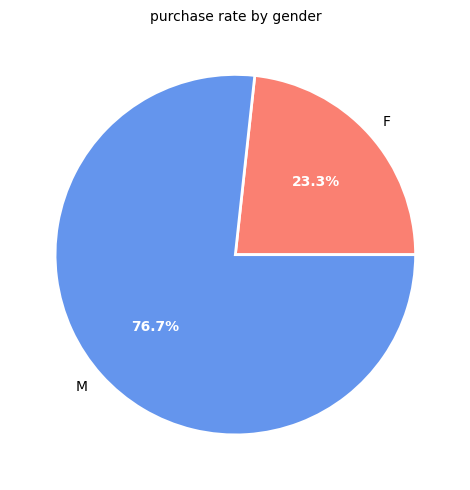

In [28]:
gender_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
gender_purchase

genders = [gender for gender in gender_purchase['Gender']]
purchase_amt = [amt for amt in gender_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['salmon', 'cornflowerblue']

patches, texts, pcts = ax.pie(
    purchase_amt, labels = genders, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('purchase rate by gender', fontsize = '10')
plt.tight_layout()

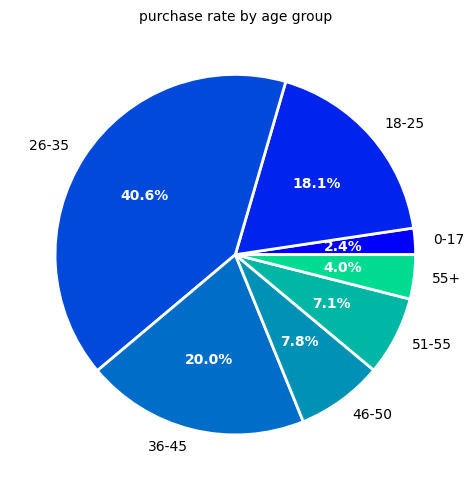

In [29]:
m_df = df[df['Gender'] == 'M']
age_purchase = m_df.groupby('Age')['Purchase'].sum().reset_index()
ages = [age for age in age_purchase['Age']]
purchase_amt = [amt for amt in age_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
theme = plt.get_cmap('winter')
ax.set_prop_cycle("color", [theme(1. * i / len(ages)) for i in range(len(ages))])

patches, texts, pcts = ax.pie(
    purchase_amt, labels = ages, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'})

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('purchase rate by age group', fontsize = '10')
plt.tight_layout()

In [30]:
# Popular product by age group

# 26-35
purchase_26_35 = m_df[m_df['Age'] == '26-35'].groupby('Product_ID')['Purchase'].sum().reset_index()
purchase_26_35 = purchase_26_35.sort_values(by = 'Purchase', ascending = False)[:10].reset_index()
purchase_26_35[['Product_ID', 'Purchase']]

,Product_ID,Purchase
0,P00025442,8605328
1,P00110742,8488003
2,P00184942,7936977
3,P00237542,7864700
4,P00057642,7728454
5,P00112142,7491531
6,P00110942,7462648
7,P00255842,7455002
8,P00028842,7339219
9,P00059442,7224104


[Text(0.5, 1.0, 'Purchase rate by Occupation')]

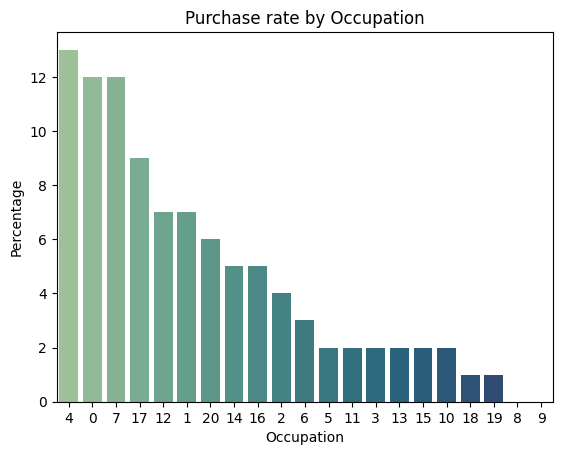

In [31]:
# How's the men's purchase distribution by occupation?

occu_purchase = m_df.groupby('Occupation')['Purchase'].sum().reset_index()
occu_purchase['Percentage'] = round((occu_purchase['Purchase'] / occu_purchase['Purchase'].sum()) * 100, 0)

occu_purchase.sort_values('Percentage')

sns.barplot(x = 'Occupation', y = 'Percentage', data = occu_purchase, palette = "crest",
            order = occu_purchase.sort_values('Percentage', ascending = False).Occupation).set(title = 'Purchase rate by Occupation')


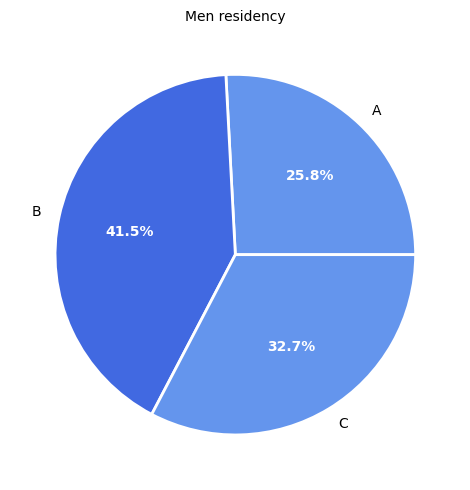

In [32]:
# Where does men live?

city_purchase = m_df.groupby('City_Category')['Purchase'].sum().reset_index()
citys = [city for city in city_purchase['City_Category']]
amt = [amt for amt in city_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['cornflowerblue', 'royalblue']

patches, texts, pcts = ax.pie(
    amt, labels = citys, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Men residency', fontsize = '10')
plt.tight_layout()

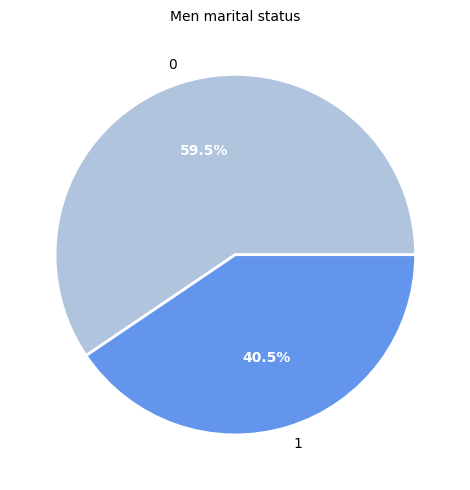

In [33]:
# Do men get married?

marital_purchase = m_df.groupby('Marital_Status')['Purchase'].sum().reset_index()
marital = [val for val in marital_purchase['Marital_Status']]
amt = [amt for amt in marital_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['lightsteelblue', 'cornflowerblue']

patches, texts, pcts = ax.pie(
    amt, labels = marital, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Men marital status', fontsize = '10')
plt.tight_layout()

In [34]:
# kmeans clustering

m_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


- gender : categorical
- Age :
- Occupation : categorical
- City_Category : categorical
- Stay_In_Current_City_Years : continuous
- Marital_status : categorical
- Product_Category : categorical
- Purchase : continuous


In [39]:
temp = m_df[['Age', 'Occupation','Marital_Status']]
temp.head()

,Age,Occupation,Marital_Status
4,55+,16,0
5,26-35,15,0
6,46-50,7,1
7,46-50,7,1
8,46-50,7,1


In [43]:
temp['Occupation'] = temp['Occupation'].apply(lambda x:str(x))

<ipython-input-43-b604bf36cb73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Occupation'] = temp['Occupation'].apply(lambda x:str(x))


In [46]:
temp['Marital_Status'] = temp['Marital_Status'].apply(lambda x : str(x))

<ipython-input-46-91e893ffe1be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Marital_Status'] = temp['Marital_Status'].apply(lambda x : str(x))


In [47]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414259 entries, 4 to 550063
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Age             414259 non-null  object
 1   Occupation      414259 non-null  object
 2   Marital_Status  414259 non-null  object
dtypes: object(3)
memory usage: 12.6+ MB


In [48]:
temp.head()

,Age,Occupation,Marital_Status
4,55+,16,0
5,26-35,15,0
6,46-50,7,1
7,46-50,7,1
8,46-50,7,1


In [69]:
data = temp.values
len(data)

414259

In [80]:
 data = data[:10000]

In [ ]:
# categorical variables
# k-mode clustering
# dummy vs one-hot encoding?

!pip install kmodes
from kmodes.kmodes import KModes

  0%|          | 0/4 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18816.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 18816.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 18816.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 18816.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


 25%|██▌       | 1/4 [00:04<00:13,  4.37s/it]

Run 5, iteration: 1/100, moves: 0, cost: 18816.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14720.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2478, cost: 14913.0
Run 2, iteration: 2/100, moves: 444, cost: 14913.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 501, cost: 14993.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


 50%|█████     | 2/4 [00:08<00:07,  4.00s/it]

Run 5, iteration: 1/100, moves: 1006, cost: 16025.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2618, cost: 13981.0
Run 1, iteration: 2/100, moves: 71, cost: 13981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2139, cost: 14733.0
Run 2, iteration: 2/100, moves: 255, cost: 14733.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2255, cost: 14160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 158, cost: 14399.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


 75%|███████▌  | 3/4 [00:11<00:03,  3.87s/it]

Run 5, iteration: 1/100, moves: 412, cost: 12983.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 897, cost: 13930.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 834, cost: 12766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1622, cost: 11696.0
Run 3, iteration: 2/100, moves: 73, cost: 11696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 550, cost: 12162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 535, cost: 13466.0
Best run was number 3


100%|██████████| 4/4 [00:16<00:00,  4.20s/it]


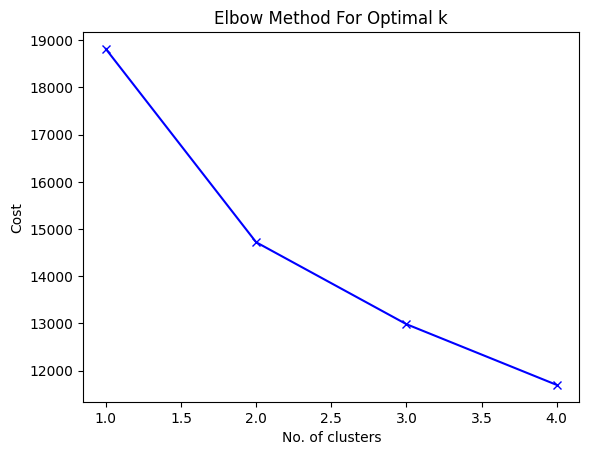

In [81]:
from tqdm import tqdm

cost = []
K = range(1, 5)
for num_clusters in tqdm(list(K)):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 5, verbose = 1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [82]:
kmode = KModes(n_clusters = 3, init = "random", n_init = 5, verbose = 1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 422, cost: 13285.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2235, cost: 12368.0
Run 2, iteration: 2/100, moves: 1311, cost: 12368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 418, cost: 14614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1376, cost: 12205.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 806, cost: 12221.0
Best run was number 4


array([1, 2, 0, ..., 1, 1, 1], dtype=uint16)

In [99]:
data = np.insert(data, 3, clusters, axis = 1)
data

array([['55+', '16', '0', 1],
       ['26-35', '15', '0', 2],
       ['46-50', '7', '1', 0],
       ...,
       ['18-25', '4', '0', 1],
       ['18-25', '4', '0', 1],
       ['18-25', '4', '0', 1]], dtype=object)

In [101]:
result = pd.DataFrame(data, columns = ['age', 'occupation', 'marital_status', 'cluster'])
result.head()

,age,occupation,marital_status,cluster
0,55+,16,0,1
1,26-35,15,0,2
2,46-50,7,1,0
3,46-50,7,1,0
4,46-50,7,1,0
